[Reference](https://medium.com/the-research-nest/multi-threading-in-python-a-fun-experiment-482ff2468f2f)

In [3]:
import requests
import threading

# Create an array of URLs (each number at the end refers to an anime page)
urls = ['https://myanimelist.net/anime/{}'.format(i) for i in range(1, 21)]

# Create the helper functions
def download_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        return None

# Normal method: loop through all URLs
def download_all_urls(urls):
    contents = []
    for url in urls:
        content = download_url(url)
        contents.append(content)
    return contents

# Multithreading medhod
def download_all_urls_multithreading(urls):
    contents = []
    threads = []

    # Define a function to download the contents of a URL in a thread
    def download_thread(url):
        content = download_url(url)
        contents.append(content)

    # Create a thread for each URL and start it
    for url in urls:
        thread = threading.Thread(target=download_thread, args=(url,))
        threads.append(thread)
        thread.start()

    # Wait for all threads to finish
    for thread in threads:
        thread.join()

    return contents

Time taken by normal method: 12.68 seconds
Time taken by multithreading method: 2.76 seconds


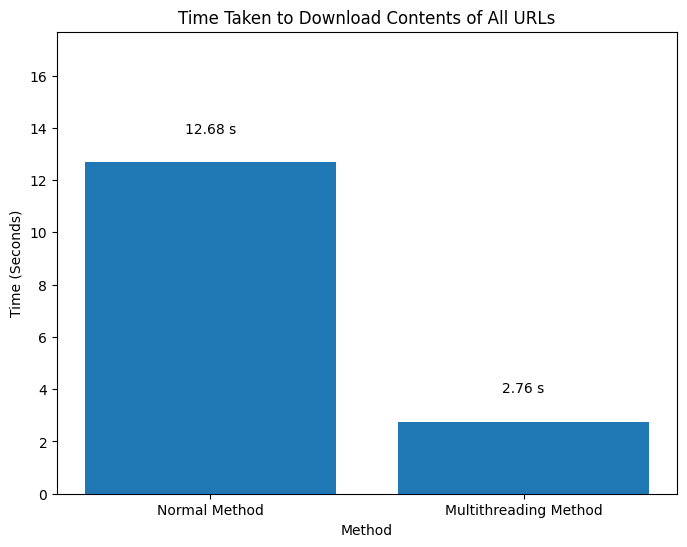

In [4]:
import time
import matplotlib.pyplot as plt

# Measure the time taken by the normal method function
start_time = time.time()
contents_normal = download_all_urls(urls)
end_time = time.time()
time_normal = end_time - start_time

# Print the time taken by the normal function
print('Time taken by normal method: {:.2f} seconds'.format(time_normal))

# Measure the time taken by the multithreading function
start_time = time.time()
contents_multithreading = download_all_urls_multithreading(urls)
end_time = time.time()
time_multithreading = end_time - start_time

# Print the time taken by the multithreading function
print('Time taken by multithreading method: {:.2f} seconds'.format(time_multithreading))

# Set plot size
plt.figure(figsize=(8, 6))

# Create a bar chart
labels = ['Normal Method', 'Multithreading Method']
times = [time_normal, time_multithreading]
plt.bar(labels, times)

# Add annotations to the chart
plt.title('Time Taken to Download Contents of All URLs')
plt.xlabel('Method')
plt.ylabel('Time (Seconds)')
plt.ylim(top=max(times) + 5)
for i, v in enumerate(times):
    plt.text(i, v + 1, '{:.2f} s'.format(v), ha='center', va='bottom')

# Display the chart
plt.show()

In [5]:
# ThreadPool Executor method
import concurrent.futures

def download_all_urls_threadpool(urls):
    contents = []

    # Define a function to download the contents of a URL using the thread pool
    def download_thread(url):
        content = download_url(url)
        return content

    # Use a thread pool to download the contents of all URLs
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(download_thread, url) for url in urls]

        # Wait for all futures to complete
        for future in concurrent.futures.as_completed(futures):
            content = future.result()
            contents.append(content)
    return contents